# Week3 - Homework

Write a rule based predictor for the dataset below. 

Choose one of the following datasets and do your EDA. 
Test your assumptions. 

Finally write your code in `predict_one` function. 

Do __NOT__ change the function signature! This function should only take name and return `F` or `M`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'
#in_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/in_names.csv'

df = pd.read_csv(us_names)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    27999 non-null  object
 1   gender  27999 non-null  object
dtypes: object(2)
memory usage: 656.2+ KB


In [2]:
df.gender.value_counts()

M    14000
F    13999
Name: gender, dtype: int64

**View the first five rows in dataset**

In [3]:
df.head()

,name,gender
0,jerilynn,F
1,percy,M
2,landry,M
3,reynalda,F
4,girl,F


**View the last five rows in dataset**

In [4]:
df.tail()

,name,gender
27995,emelio,M
27996,holt,M
27997,silvestre,M
27998,annastacia,F
27999,eliam,M


**Print the shape of the dataset**

In [5]:
df.shape

(27999, 2)

**View the data types**

In [6]:
df.dtypes

name      object
gender    object
dtype: object

**Find the unique count in dataset**

In [7]:
df.nunique()

name      25948
gender        2
dtype: int64

**View the first five rows of dataset before removing duplicates**

In [8]:
df.head()

,name,gender
0,jerilynn,F
1,percy,M
2,landry,M
3,reynalda,F
4,girl,F


**Drop the duplicates in name column**

In [9]:
df = df.drop_duplicates(subset='name')

**View the shape in the dataset after removing duplicates**

In [10]:
df.shape

(25948, 2)

**View the head of dataset after removing duplicates**

In [11]:
df.head()

,name,gender
0,jerilynn,F
1,percy,M
2,landry,M
3,reynalda,F
4,girl,F


**View the tail of dataset after removing duplicates**

In [12]:
df.tail()

,name,gender
27995,emelio,M
27996,holt,M
27997,silvestre,M
27998,annastacia,F
27999,eliam,M


**Find the unique count in dataset**

In [13]:
df.nunique()

name      25948
gender        2
dtype: int64

**Convert the name column into lower case**

In [14]:
df['name'] = df['name'].str.lower()
df['name']

0          jerilynn
1             percy
2            landry
3          reynalda
4              girl
            ...    
27995        emelio
27996          holt
27997     silvestre
27998    annastacia
27999         eliam
Name: name, Length: 25948, dtype: object

**Divide the name column into male and female names**

In [15]:
df['male_names'] = df[df['gender']=='M']['name']
df['male_names'] # male names

0              NaN
1            percy
2           landry
3              NaN
4              NaN
           ...    
27995       emelio
27996         holt
27997    silvestre
27998          NaN
27999        eliam
Name: male_names, Length: 25948, dtype: object

In [16]:
df['female_names'] = df[df['gender']=='F']['name']
df['female_names'] # female_names

0          jerilynn
1               NaN
2               NaN
3          reynalda
4              girl
            ...    
27995           NaN
27996           NaN
27997           NaN
27998    annastacia
27999           NaN
Name: female_names, Length: 25948, dtype: object

In [17]:
df.head() # View the head of the dataset

,name,gender,male_names,female_names
0,jerilynn,F,NaN,jerilynn
1,percy,M,percy,NaN
2,landry,M,landry,NaN
3,reynalda,F,NaN,reynalda
4,girl,F,NaN,girl


In [18]:
df.tail() # View the tail of the dataset

,name,gender,male_names,female_names
27995,emelio,M,emelio,NaN
27996,holt,M,holt,NaN
27997,silvestre,M,silvestre,NaN
27998,annastacia,F,NaN,annastacia
27999,eliam,M,eliam,NaN


In [19]:
df.dtypes # view the data types of dataset

name            object
gender          object
male_names      object
female_names    object
dtype: object

**Find the starting letter count in male names column**

In [20]:
m_s_letter = df['male_names'].str[0]
m_s_letter_count = m_s_letter.value_counts().sort_index()
print(m_s_letter_count)
m_s_letter_count.sort_values(ascending=False).head(5)

a    1226
b     576
c     728
d     936
e     589
f     228
g     375
h     449
i     223
j    1159
k     947
l     539
m     830
n     386
o     249
p     239
q      82
r     714
s     816
t     738
u      56
v     194
w     203
x      37
y     241
z     236
Name: male_names, dtype: int64


a    1226
j    1159
k     947
d     936
m     830
Name: male_names, dtype: int64

**Plot the count of starting letter count of male names**

<AxesSubplot:>

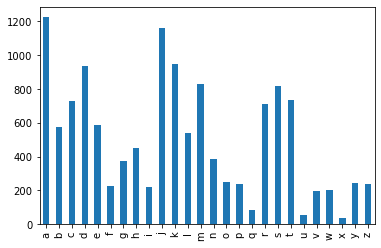

In [21]:
m_s_letter_count.plot(kind = 'bar')

**Find the ending letter count in male name column**

In [22]:
m_e_letter = df['male_names'].str[-1]
m_e_letter_count = m_e_letter.value_counts().sort_index()
print(m_e_letter_count)
m_e_letter_count.sort_values(ascending=False).head(5)

a     546
b      91
c      80
d     537
e    1287
f      74
g     125
h     414
i     558
j      47
k     308
l     998
m     312
n    3277
o    1047
p      46
q      15
r     910
s     917
t     325
u     108
v      62
w      33
x      56
y     728
z      95
Name: male_names, dtype: int64


n    3277
e    1287
o    1047
l     998
s     917
Name: male_names, dtype: int64

**Plot the count of ending letter count of male names**

<AxesSubplot:>

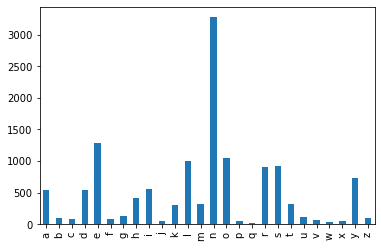

In [23]:
m_e_letter_count.plot(kind = 'bar')

**Find the starting letter count in female names column**

In [24]:
f_s_letter = df['female_names'].str[0]
f_s_letter_count = f_s_letter.value_counts().sort_index()
print(f_s_letter_count)
f_s_letter_count.sort_values(ascending=False).head(5)

a    1627
b     484
c     792
d     656
e     548
f     176
g     294
h     261
i     248
j     847
k     921
l     872
m    1194
n     493
o     123
p     209
q      30
r     512
s    1183
t     641
u      17
v     216
w     103
x      38
y     241
z     226
Name: female_names, dtype: int64


a    1627
m    1194
s    1183
k     921
l     872
Name: female_names, dtype: int64

**Plot the count of starting letter count of female names**

<AxesSubplot:>

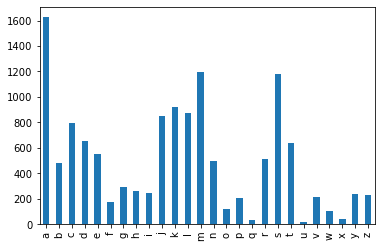

In [25]:
f_s_letter_count.plot(kind = 'bar')

**Find the ending letter count in female names column**

In [26]:
f_e_letter = df['female_names'].str[-1]
f_e_letter_count = f_e_letter.value_counts().sort_index()
print(f_e_letter_count)
f_e_letter_count.sort_values(ascending=False).head(5)

a    5302
b      10
c      12
d      53
e    2430
f       2
g      31
h     811
i     884
j       3
k      23
l     413
m      59
n    1279
o     135
p       6
q       2
r     177
s     233
t     162
u      39
v       3
w       5
x       8
y     838
z      32
Name: female_names, dtype: int64


a    5302
e    2430
n    1279
i     884
y     838
Name: female_names, dtype: int64

**Plot the count of ending letter count of female names**

<AxesSubplot:>

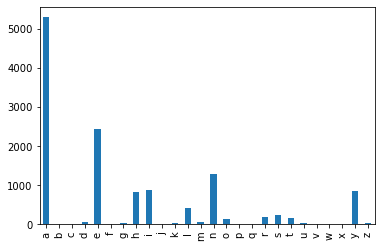

In [27]:
f_e_letter_count.plot(kind = 'bar')

**Extract the middle name from the name column**

In [28]:
df['normal_middle'] = df['name'].str[1:-1]
print(df['normal_middle'])

0          erilyn
1             erc
2            andr
3          eynald
4              ir
           ...   
27995        meli
27996          ol
27997     ilvestr
27998    nnastaci
27999         lia
Name: normal_middle, Length: 25948, dtype: object


**Get the counts of middle value**

In [29]:
counts = df['normal_middle'].value_counts().sort_index()
counts

            75
a          102
aa           6
aabi         1
aach         1
          ... 
zzabell      1
zzar         1
zzi          3
zzia         1
zzie         1
Name: normal_middle, Length: 13890, dtype: int64

**Groupby gender and middle value**

In [30]:
df.groupby('gender')['normal_middle'].value_counts().sort_values(ascending = False)

gender  normal_middle
M       a                77
        e                52
        o                49
                         47
        ar               37
                         ..
F       nabiy             1
        nacan             1
        nacarolin         1
        nacecili          1
M       zzie              1
Name: normal_middle, Length: 15672, dtype: int64

### Two examples:

In [31]:
df['is_last_letter_vowel'] = [ 'aeiou'.find(name[-1])>0 for name in df.name]

<AxesSubplot:xlabel='is_last_letter_vowel', ylabel='count'>

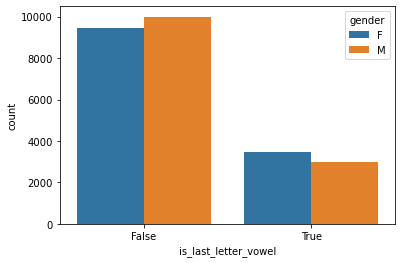

In [32]:
import seaborn as sns

sns.countplot(data = df, x = 'is_last_letter_vowel', hue = 'gender')

It looks like last letter is being a vowel is not a good indicator for this dataset!

<AxesSubplot:xlabel='len', ylabel='count'>

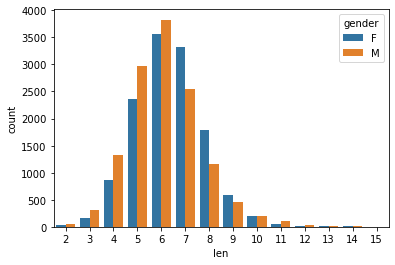

In [33]:
df['len'] = [ len(name) for name in df.name]
sns.countplot(data = df, x = 'len', hue = 'gender')

Seems like length doesn't also seem like a good separator

**Find if starting letter is vowel**

In [34]:
df['is_starting_letter_vowel'] = [ 'aeiou'.find(name[0])>0 for name in df.name]

<AxesSubplot:xlabel='is_starting_letter_vowel', ylabel='count'>

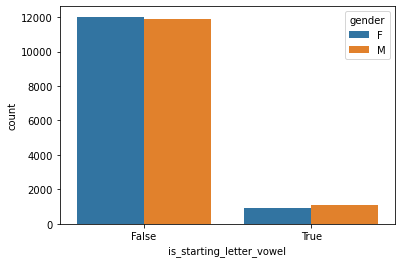

In [35]:
import seaborn as sns

sns.countplot(data = df, x = 'is_starting_letter_vowel', hue = 'gender')

It can be derived that starting letter being a vowel is not a good indicator for this dataset

**Predict the gender (first_letter of name is vowel)**

In [36]:
def predict_one(name):
    s = ['a','e','i','o','u']
    first_letter = name[0]
    last_letter = name[-1]
    if first_letter in s:
        return 'F'
    else:
        return 'M'

In [37]:
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5093263449976877


**Predict the gender (last_letter of name is vowel)**

In [38]:
def predict_one(name):
    s = ['a','e','i','o','u']
    first_letter = name[0]
    last_letter = name[-1]
    if last_letter in s:
        return 'F'
    else:
        return 'M'

In [39]:
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7029443502389394


**Predict the gender based on highest frequency in last letter of name**

In [40]:
def predict_one(name):
    s = ['a','e','i','h','y']
    first_letter = name[0]
    last_letter = name[-1]
    if last_letter in s:
        return 'F'
    else:
        return 'M'

In [41]:
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7602898103900108


### Predict gender based on the frequency of letter which are having same last and first letter

**Find the count of last letter of male names which are having same last and first letter**

In [42]:
df[df['male_names'].str[0] == df['male_names'].str[-1]]['name'].str[-1].value_counts()

n    76
a    51
e    42
r    41
s    40
d    38
l    30
o    23
k    20
h    19
y    14
m    11
t    11
i    11
g     7
c     5
p     4
v     4
b     3
j     2
w     2
u     1
Name: name, dtype: int64

**Find the count of last letter of female names which are having same last and first letter**

In [43]:
df[df['female_names'].str[0] == df['female_names'].str[-1]]['name'].str[-1].value_counts()

a    766
e    127
l     20
n     19
y     17
h     16
i     12
m     12
r      4
t      3
s      3
d      2
o      2
w      1
c      1
b      1
Name: name, dtype: int64

In [44]:
def predict_one(name):
    # your code
    m_e_fre = ['n','o','l','s','r','d']
    f_e_fre = ['a','e','y','i','m','h']
    first_letter = name[0]
    last_letter = name[-1]
    if last_letter in f_e_fre:
        return 'F'
    else:
        return 'M'


In [45]:
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.750539540619701


In [46]:
def predict_gender(name):
    first_letter = name[0]
    last_letter = name[-1]
   
    if first_letter == 'a' or last_letter=='a':
        return 'F'
    else:
        return 'M'

In [47]:
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.750539540619701


**Predict gender based on vowel count of both male names and female names**

In [48]:
df['male_vowel_count'] = df['male_names'].str.count('[aeiou]')
df['male_vowel_count']

0        NaN
1        1.0
2        1.0
3        NaN
4        NaN
        ... 
27995    4.0
27996    1.0
27997    3.0
27998    NaN
27999    3.0
Name: male_vowel_count, Length: 25948, dtype: float64

In [49]:
df['male_vowel_count'].max()

7.0

In [50]:
df['female_vowel_count'] = df['female_names'].str.count('[aeiou]')
df['female_vowel_count']

0        2.0
1        NaN
2        NaN
3        3.0
4        1.0
        ... 
27995    NaN
27996    NaN
27997    NaN
27998    5.0
27999    NaN
Name: female_vowel_count, Length: 25948, dtype: float64

In [51]:
df['female_vowel_count'].max()

8.0

In [52]:
def predict_gender(name):
    
    if name.str.count('[aeiou]')>7.0:
        return 'F'
    else:
        return 'M'

In [53]:
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.750539540619701


***Based on the above executed code, I can say that the ending letters which are having the highest frequency has impact on accuarcy (the value of Accuracy is 0.7602898103900108)***